# Human Activity Recognition Using Smartphones

In [2]:
import statistics

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_validate

In [3]:
df = pd.read_csv("human_activity.csv")

# Delete index column
df.drop("rn", axis=1, inplace=True)

In [4]:
df.head()

,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,-0.983,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,-0.985,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,-0.992,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,-0.888,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,-0.997,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [5]:
label_df = df["activity"]
features_df = df.drop("activity", axis=1)

# Convert features dataframe to numpy array
X = features_df.values
Y = label_df.values

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

# Data Visualization

In [5]:
color_dict = {
    "STANDING": "r",
    "SITTING": "g",
    "LAYING": "b",
    "WALKING": "c",
    "WALKING_DOWNSTAIRS": "m",
    "WALKING_UPSTAIRS": "y"
}

points_dict = {
    "STANDING": [],
    "SITTING": [], 
    "LAYING": [],
    "WALKING": [],
    "WALKING_DOWNSTAIRS": [],
    "WALKING_UPSTAIRS": []
}

In [ ]:
# Construct the TSNE object for dimensionality reduction
reducer = TSNE()

X_reduced = reducer.fit_transform(X)

for index, value in enumerate(X_reduced):
    points_dict[Y[index]].append(value)

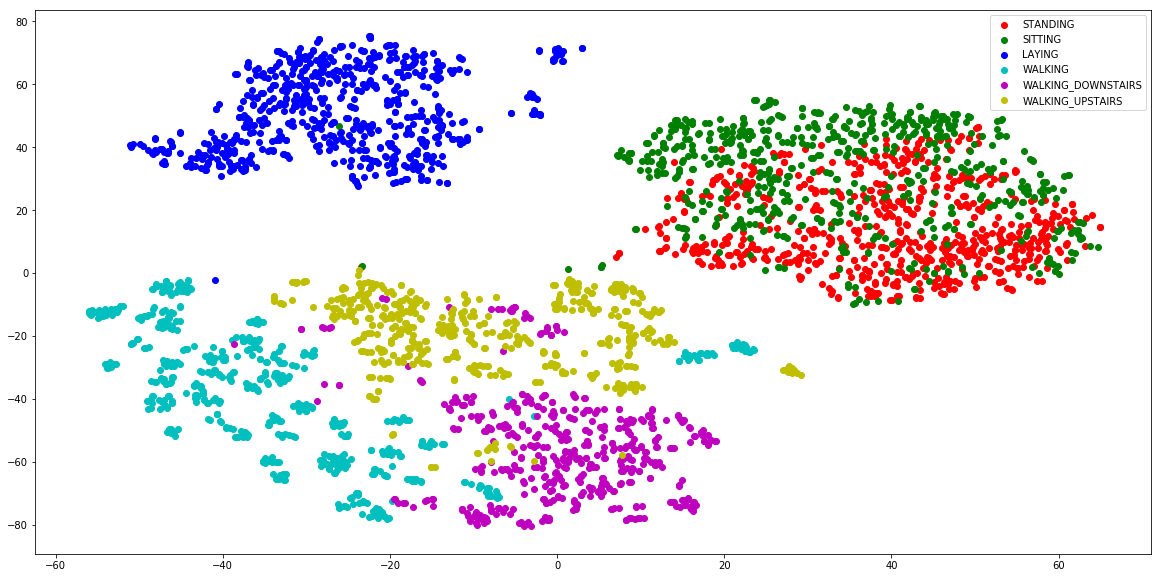

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))

for key in color_dict:
    ax.scatter(*list(zip(*points_dict[key])), c=color_dict[key], label=key)
    
ax.legend()
plt.savefig("dataset.png")

# Logistic Regression

In [36]:
from sklearn import linear_model

In [37]:
# The hyperparameters to check
c_values = [0.1, 0.5, 1, 10, 100]

best_c = c_values[0]
best_score = 0

for c_value in c_values:
    clf = linear_model.LogisticRegression(C=c_value)
    
    cv_results = cross_validate(clf, x_train, y_train, cv=5, return_train_score=False, scoring=("accuracy"), n_jobs=-1)
    
    scores = cv_results["test_score"]
    
    score = statistics.mean(scores)
    
    if(score > best_score):
        best_score = score
        best_c = c_value

In [38]:
print(f"Best C: {best_c}")

Best C: 10


In [39]:
clf = linear_model.LogisticRegression(C=c_value)
clf.fit(x_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
y_pred = clf.predict(x_test)

In [42]:
print(accuracy_score(y_test, y_pred))

0.9748110831234257


## SVM

In [22]:
from sklearn import svm

In [28]:
# The hyperparameters to check
c_values = [0.1, 0.5, 1, 10, 100]

best_c = c_values[0]
best_score = 0

for c_value in c_values:
    clf = svm.SVC(C=c_value)
    
    cv_results = cross_validate(clf, x_train, y_train, cv=5, return_train_score=False, scoring=("accuracy"), n_jobs=-1)
    
    scores = cv_results["test_score"]
    
    score = statistics.mean(scores)
    
    if(score > best_score):
        best_score = score
        best_c = c_value

In [30]:
print(f"Best C: {best_c}")

Best C: 100


In [33]:
# Train the classifier with best hyperparameter
clf = svm.SVC(best_c)
clf.fit(x_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
y_pred = clf.predict(x_test)

In [35]:
print(accuracy_score(y_test, y_pred))

0.984047019311503


## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

/home/diwas/.local/share/virtualenvs/project1-fd0McGSw/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [44]:
parameters_values = [
    {
        "n_estimators": 12
    },
    {
        "n_estimators": 10
    },
    {
        "n_estimators": 24
    }
]

best_parameters = parameters_values[0]
best_score = 0

for parameters in parameters_values:
    clf = RandomForestClassifier(**parameters)
    
    cv_results = cross_validate(clf, x_train, y_train, cv=5, return_train_score=False, scoring=("accuracy"), n_jobs=-1)
    
    scores = cv_results["test_score"]
    
    score = statistics.mean(scores)
    
    if(score > best_score):
        best_score = score
        best_parameters = parameters

In [48]:
print(best_parameters)

{'n_estimators': 24}


In [45]:
clf = RandomForestClassifier(**best_parameters)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=24, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
y_pred = clf.predict(x_test)

In [47]:
print(accuracy_score(y_test, y_pred))

0.9588581024349286
